<a href="https://colab.research.google.com/github/matildecanete/Proyecto-Analisis-de-los-ingresos-de-los-hogares/blob/main/An%C3%A1lisis_de_los_ingresos_de_los_hogares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [54]:
df = pd.read_csv('/content/household income.zip')
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [55]:
df.shape

(10000, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [57]:
df.isna().sum()

,0
Age,0
Education_Level,0
Occupation,0
Number_of_Dependents,0
Location,0
Work_Experience,0
Marital_Status,0
Employment_Status,0
Household_Size,0
Homeownership_Status,0


>No hay valores faltantes.

In [58]:
df.duplicated().sum()

0

>No hay valores duplicados.

In [59]:
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


>Se puede observar que hay una gran variabilidad en los datos.

>Work_Experience tiene una mediana de 25 años, pero con un rango que va de 0 a 50 años, lo que muestra una distribución amplia en la experiencia laboral.

>Household_Size tiene un valor máximo de 7, lo que podría indicar que los hogares más grandes tienen hasta 7 personas.

>Income tiene una media muy alta (816,838) y una desviación estándar aún mayor (1,821,089), lo que sugiere que hay una gran variabilidad en los ingresos de los hogares y posiblemente la presencia de outliers (valores extremos). Esto podría afectar en el rendimiento de los modelos de predicción.

In [60]:
print(df['Age'].unique(), end = "\n\n")
print(df['Number_of_Dependents'].unique(), end = "\n\n")
print(df['Work_Experience'].unique(), end = "\n\n")
print(df['Household_Size'].unique(), end = "\n\n")
print(df['Income'].value_counts(), end = "\n\n")

[56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58
 18 22 30 49 63]

[5 0 1 2 3 4]

[21  4  1 32 15  6 20 34 45 50 47  5 38 42 24 17 40 23 39 22 28  9 14 25
 33 30  8 26 29  3 46 19 44  0  2 16 31  7 43 27 18 41 13 36 37 10 35 12
 48 49 11]

[7 1 4 2 6 5 3]

Income
74306      10
71180       7
66950       6
65088       6
68116       6
           ..
65666       1
34310       1
37268       1
494819      1
1131084     1
Name: count, Length: 7667, dtype: int64



>No hay valores inconsistentes en las columnas numéricas.

In [61]:
print(df['Education_Level'].value_counts(), end = "\n\n")
print(df['Occupation'].value_counts(), end = "\n\n")
print(df['Location'].value_counts(), end = "\n\n")
print(df['Marital_Status'].value_counts(), end = "\n\n")
print(df['Employment_Status'].value_counts(), end = "\n\n")
print(df['Homeownership_Status'].value_counts(), end = "\n\n")
print(df['Type_of_Housing'].value_counts(), end = "\n\n")
print(df['Gender'].value_counts(), end = "\n\n")
print(df['Primary_Mode_of_Transportation'].value_counts(), end = "\n\n")

Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64

Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64

Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64

Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64

Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64

Homeownership_Status
Own     6018
Rent    3982
Name: count, dtype: int64

Type_of_Housing
Single-family home    4055
Apartment             4001
Townhouse             1944
Name: count, dtype: int64

Gender
Male      5123
Female    4877
Name: count, dtype: int64

Primary_Mode_of_Transportation
Public transit    4047
Car               2986
Biking            1940
Walking           1027
Name: count, dtype: int64



>No hay valores inconsistentes en las columnas categóricas.

###Visualización columnas numéricas y columnas categóricas.

In [62]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

Características numéricas

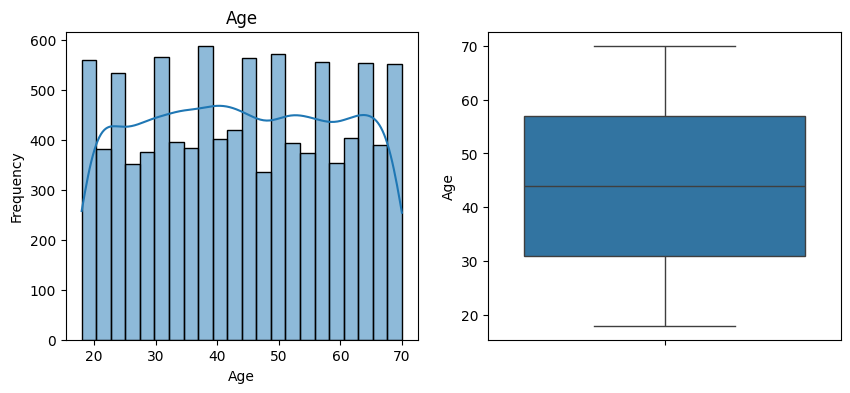

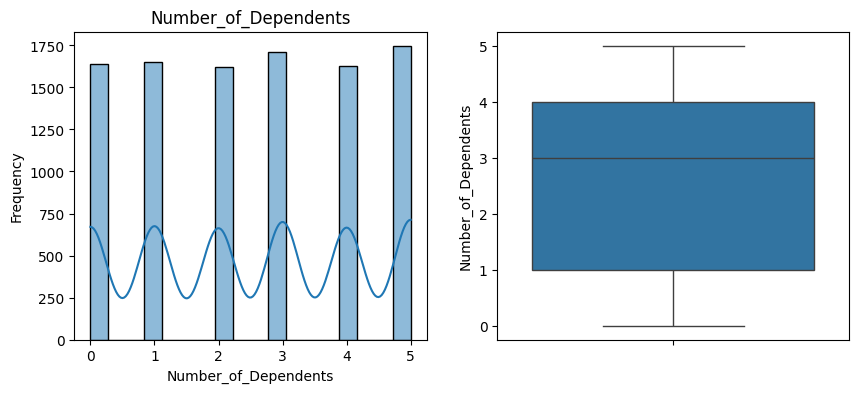

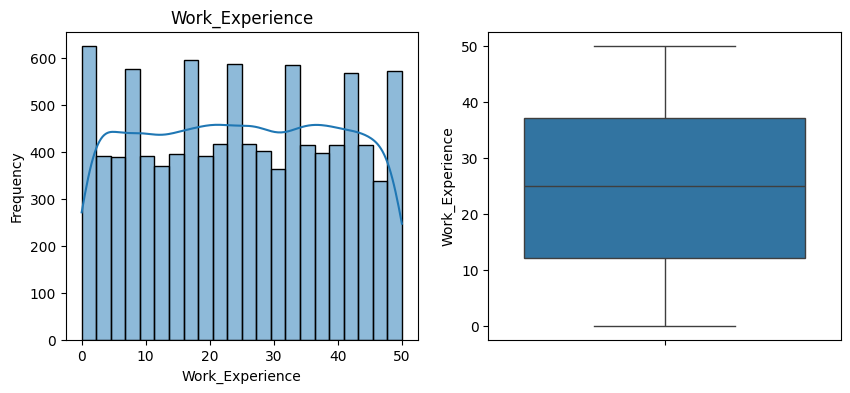

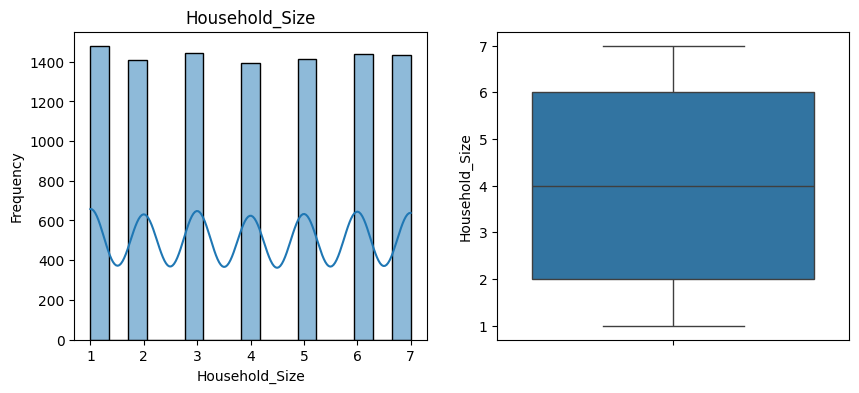

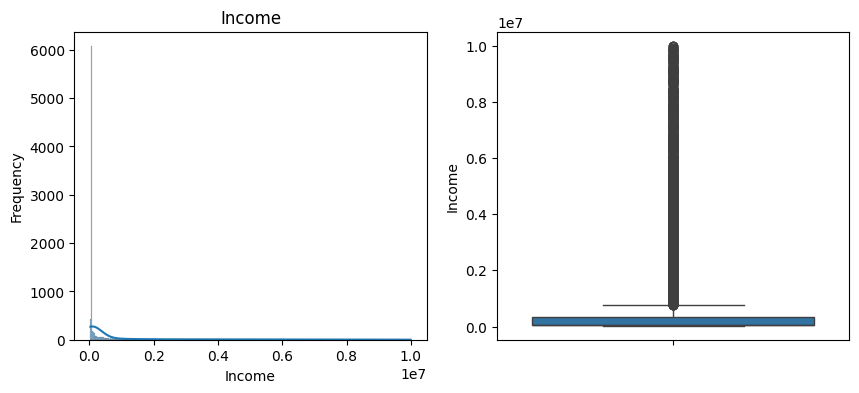

In [63]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(df[col])

    plt.show()

>Hay outliers en la característica 'Income'.

- Distribución de ingresos / característica objetivo 'Income'.

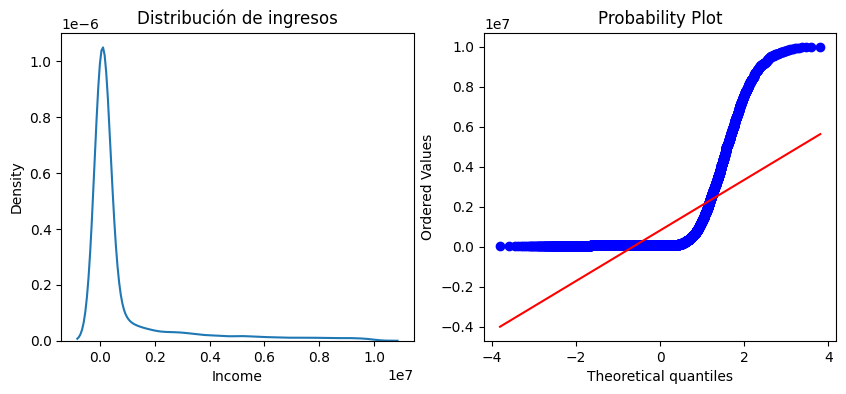

In [64]:
fig, axes = plt.subplots(figsize = (10,4), nrows=1, ncols=2)
sns.kdeplot(df['Income'], ax=axes[0]).set_title('Distribución de ingresos')
stats.probplot(df['Income'], dist="norm", plot=axes[1])
plt.show()

>No hay una distribución normal en los ingresos.

Características categóricas

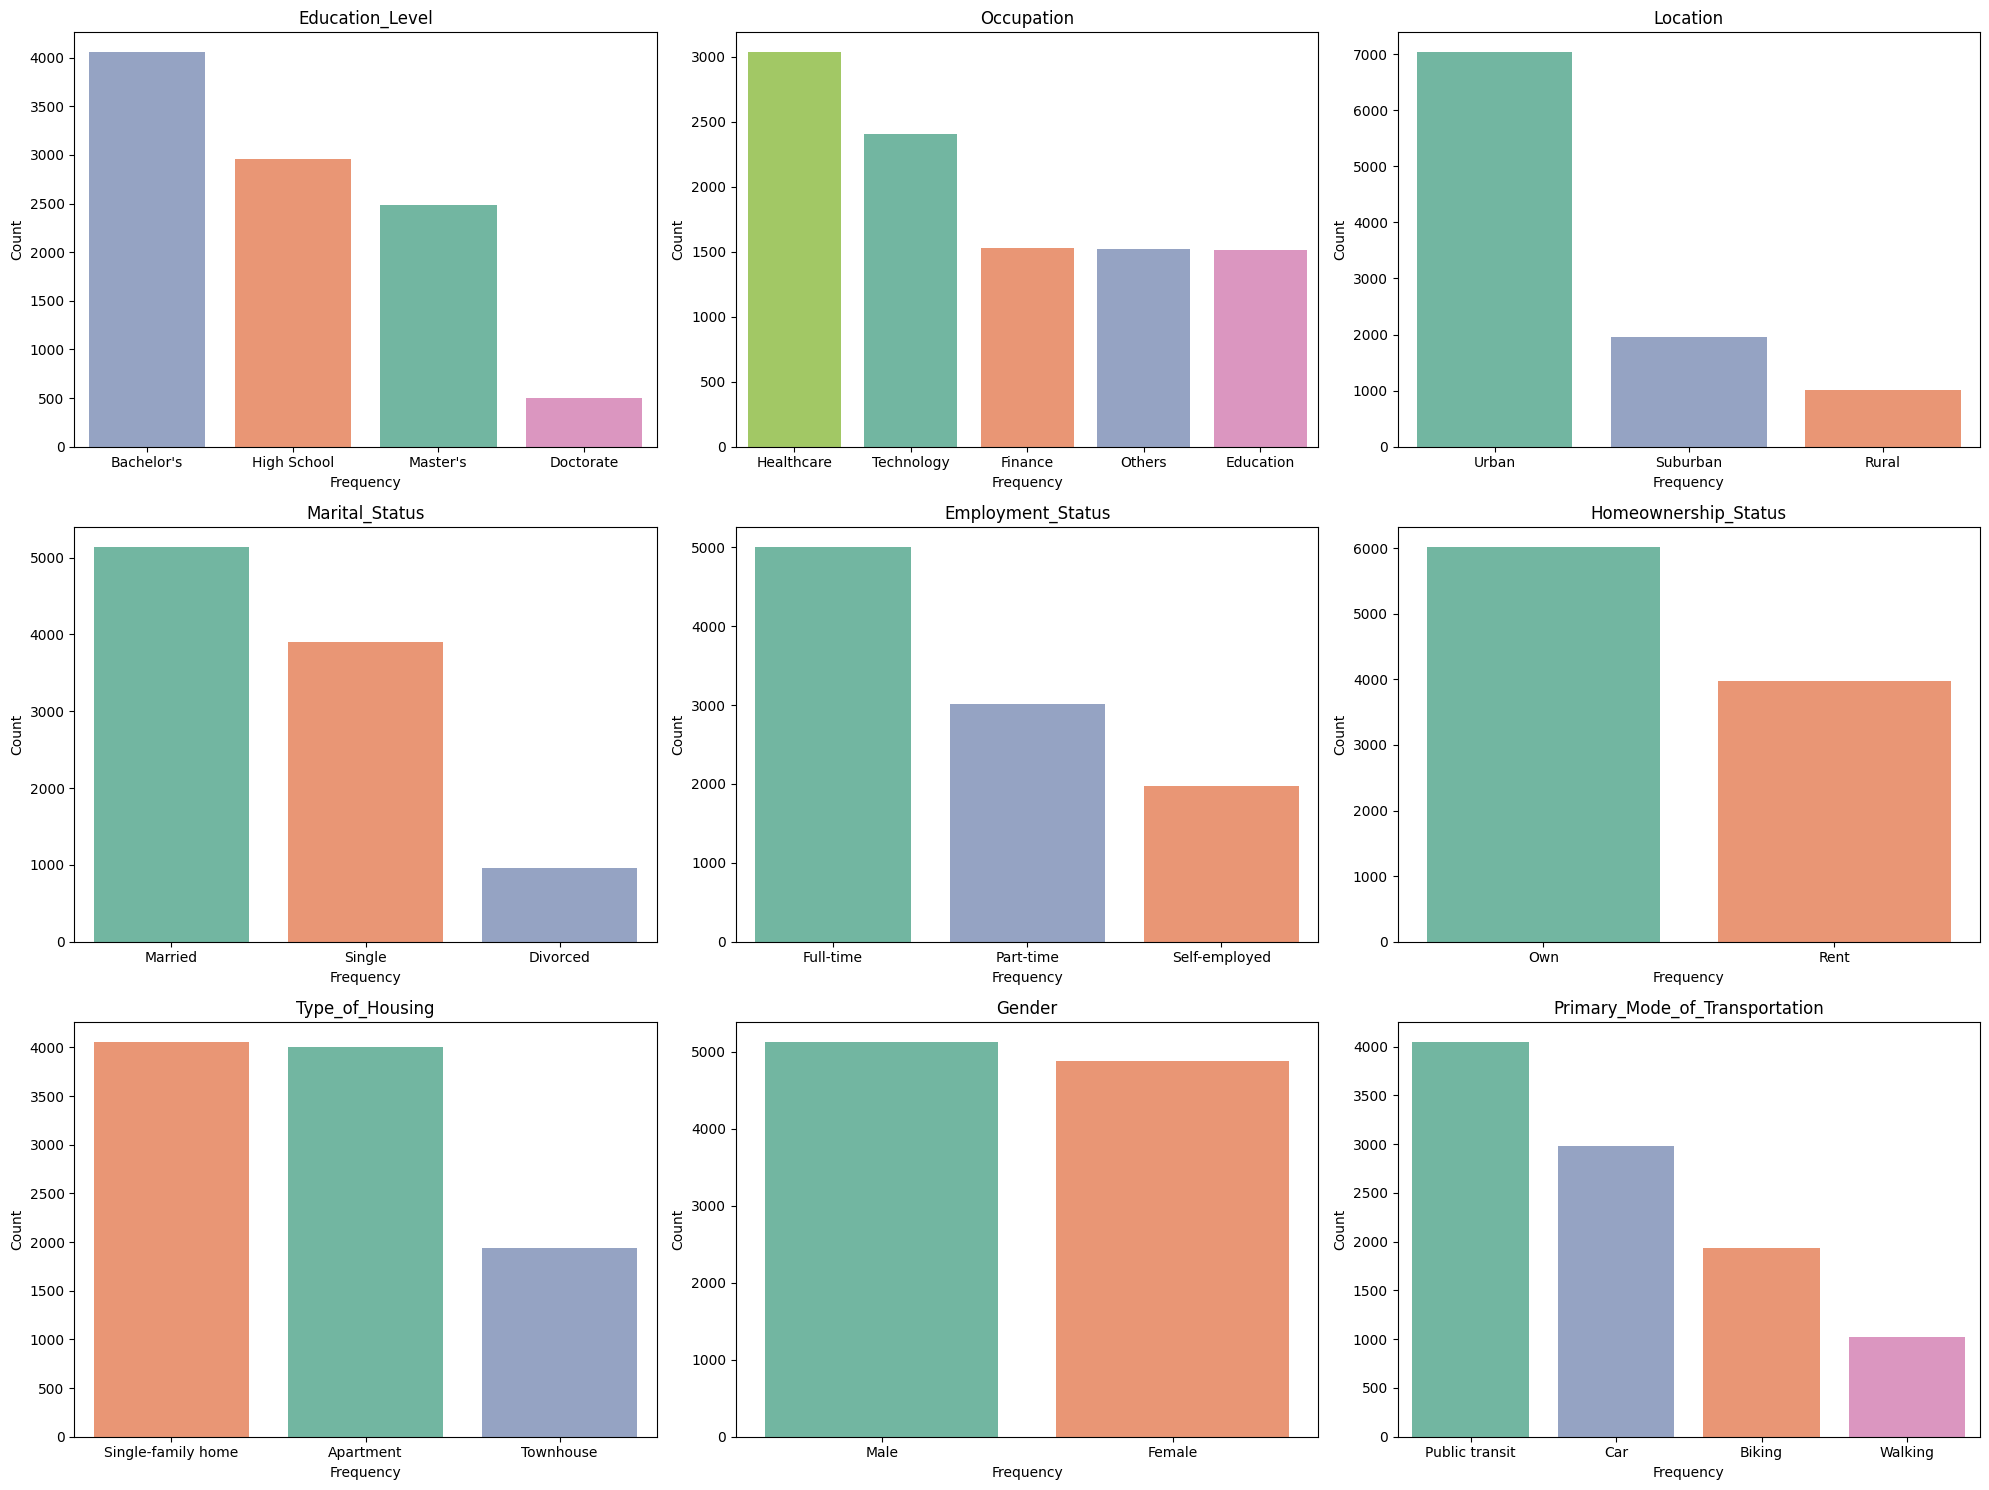

In [65]:
cat_num_cols = len(cat_cols)
cat_rows = (cat_num_cols + 2) // 3
fig, axes = plt.subplots(cat_rows, 3, figsize=(20, cat_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], hue=df[col], order=df[col].value_counts().index, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- Education Level: La distribución de esta característica muestra cuatro niveles de educación. Sin embargo, existe una disparidad notable, ya que la categoría de Doctorado tiene una frecuencia cinco veces menor que la siguiente categoría más baja.
- Occupation: Hay cinco categorías distintas. Tres de ellas tienen frecuencias similares.
- Location: La distribución de las ubicaciones es muy desigual, con una mayoría concentrada en una ubicación. Esta característica podría influir negativamente en el rendimiento del modelo predictivo, dado que una mala distribución puede causar un sesgo en las predicciones para las ubicaciones menos representadas.
- Marital Status: Similar a la ubicación, el estado civil muestra una distribución desigual con una categoría predominante.
- Employment Status: Presenta una distribución razonablemente equilibrada con tres categorías distintas.
- Homeownership Status: La distribución es aceptable con dos valores únicos.
- Type of Housing: Tiene tres valores únicos con una distribución aceptable.
- Gender: Dos valores únicos con una distribución equitativa.
- Primary Mode of Transportation: Hay cuatro modos de transporte y aunque las proporciones no son iguales, la distribución refleja patrones de uso del mundo real, lo cual es positivo, pero una mayor disparidad podría afectar la capacidad del modelo predictivo para generalizar.

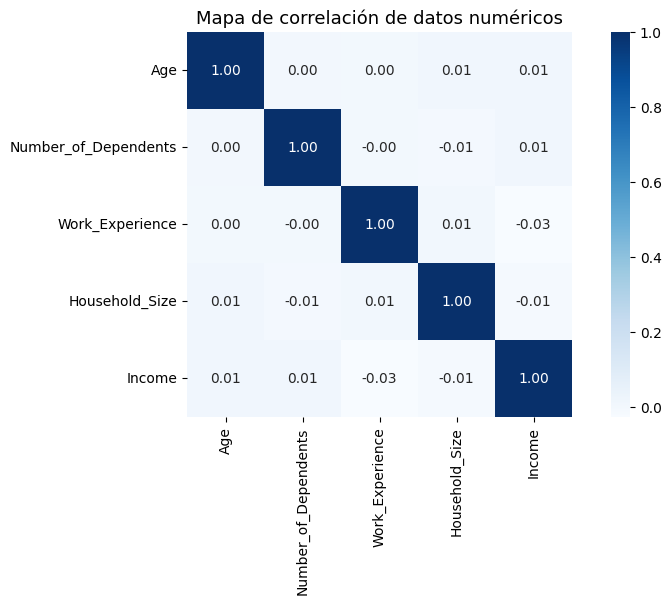

In [66]:
numeros_df = df.select_dtypes(include="number")
mapa_correlacion = numeros_df.corr()

plt.figure(figsize=(10 , 5))
sns.heatmap(mapa_correlacion, annot=True , square=True , cmap="Blues", fmt="0.2f")
plt.title("Mapa de correlación de datos numéricos" , fontsize = 13)
plt.show()

>La correlación con la característica objetivo 'Income' es muy baja. Esto sugiere que las características numéricas no están proporcionando mucha información útil para predecir el ingreso de los hogares.

In [67]:
df['Education_Level'].value_counts()

,count
Education_Level,
Bachelor's,4058
High School,2959
Master's,2482
Doctorate,501


In [68]:
df['Education_Level'].replace({"Bachelor's" : "Bachelor" , "Master's" : "Master"}, inplace=True)

In [69]:
df['Education_Level'].replace({'High School' : 0, 'Bachelor' : 1 , 'Master' : 2 , 'Doctorate' : 3} , inplace=True)

###Modelos predictivos



In [70]:
y = df['Income']
X = df.drop(columns = 'Income')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore' , sparse=False)

In [73]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [74]:
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [75]:
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [76]:
col_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c09e6b010>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c09e687f0>)])

In [77]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [78]:
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)

All data in X_train_processed are float64
All data in X_test_processed are float64


Decision Tree

In [79]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [80]:
train_preds_dec = dec_tree.predict(X_train_processed)
test_preds_dec = dec_tree.predict(X_test_processed)

In [81]:
train_score_dec = dec_tree.score(X_train_processed, y_train).round(2)
print(train_score_dec)
test_score_dec = dec_tree.score(X_test_processed, y_test).round(2)
print(test_score_dec)

1.0
-1.2


In [82]:
dec_tree.get_depth()

30

Decision Tree 2

In [83]:
dec_tree_35 = DecisionTreeRegressor(max_depth=10, random_state=42)

In [84]:
dec_tree_35.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [85]:
train_preds_dec = dec_tree_35.predict(X_train_processed)
test_preds_dec = dec_tree_35.predict(X_test_processed)

In [86]:
train_score_dec = dec_tree_35.score(X_train_processed, y_train).round(2)
print(train_score_dec)
test_score_dec = dec_tree_35.score(X_test_processed, y_test).round(2)
print(test_score_dec)

0.38
-0.33


Random Forest

In [87]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [88]:
train_preds_rf = rf.predict(X_train_processed)
test_preds_rf = rf.predict(X_test_processed)

In [89]:
train_score_rf = rf.score(X_train_processed, y_train).round(2)
print(train_score_rf)
test_score_rf = rf.score(X_test_processed, y_test).round(2)
print(test_score_rf)

0.87
0.02


Gradient Boosting

In [90]:
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train_processed, y_train)

GradientBoostingRegressor()

In [91]:
train_preds_gb = gb.predict(X_train_processed)
test_preds_gb = gb.predict(X_test_processed)

In [92]:
train_score_gb = gb.score(X_train_processed, y_train).round(2)
print(train_score_gb)
test_score_gb = gb.score(X_test_processed, y_test).round(2)
print(test_score_gb)

0.08
0.02


Métricas modelos

In [93]:
models = [dec_tree, dec_tree_35, rf, gb]
model_names = ['Decision Tree', 'Decision Tree 2', 'Random Forest', 'Gradient Boosting']
metrics_dict = {}

for model_name, model in zip(model_names, models):
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)

    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train_rounded = round(r2_train, 2)
    mse_train_rounded = round(mse_train, 2)
    rmse_train_rounded = round(rmse_train, 2)
    mae_train_rounded = round(mae_train, 2)

    r2_test_rounded = round(r2_test, 2)
    mse_test_rounded = round(mse_test, 2)
    rmse_test_rounded = round(rmse_test, 2)
    mae_test_rounded = round(mae_test, 2)

    metrics_df = pd.DataFrame({
        'Train': [r2_train_rounded, mae_train_rounded, mse_train_rounded, rmse_train_rounded],
        'Test': [r2_test_rounded, mae_test_rounded, mse_test_rounded, rmse_test_rounded]
    }, index=['R2', 'MAE', 'MSE', 'RMSE'])

    metrics_dict[model_name] = metrics_df

for model_name, metrics_df in metrics_dict.items():
    print(f"Métricas {model_name}")
    print(metrics_df.transpose())
    print("\n")

Métricas Decision Tree
        R2         MAE           MSE        RMSE
Train  1.0        0.00  0.000000e+00        0.00
Test  -1.2  1317282.33  6.947630e+12  2635835.64


Métricas Decision Tree 2
         R2         MAE           MSE        RMSE
Train  0.38   759261.35  2.085494e+12  1444123.85
Test  -0.33  1109054.56  4.181195e+12  2044797.17


Métricas Random Forest
         R2         MAE           MSE        RMSE
Train  0.87   424146.80  4.517278e+11   672106.96
Test   0.02  1146568.34  3.087269e+12  1757062.49


Métricas Gradient Boosting
         R2         MAE           MSE        RMSE
Train  0.08  1066748.14  3.097445e+12  1759955.92
Test   0.02  1093894.01  3.093893e+12  1758946.46




El análisis exploratorio de datos (EDA) muestra que las características del conjunto de datos tienen una baja correlación con la variable objetivo 'Income'. Esta ausencia de correlación sugiere que no hay patrones evidentes que permitan identificar relaciones significativas entre las características y los ingresos.

Este hallazgo se refleja en los resultados de los modelos predictivos. Las métricas obtenidas, como el R² negativo en los conjuntos de prueba y los elevados valores de MAE, MSE y RMSE, indican que los modelos no están capturando adecuadamente las relaciones importantes en los datos.

En resumen, la baja correlación observada en el EDA y la falta de patrones claros que identifiquen relaciones significativas son factores determinantes en el bajo rendimiento de los modelos. Esto sugiere que las características actuales no están proporcionando la información necesaria para predecir los ingresos de manera efectiva.

